# Goal
* 주제: 음식물쓰레기 배출 요인에 따른 제주 읍면동별 배출량 예측 및 감소방안 도출
* 예상요인
> 거주인구, 유동인구, 계절/분기, 배달 카드소비량, 코로나 전후/단계별, 관광객 수, 요일/평일주말, 관광시기(성수기/비수기), 날씨변화(강수량, 습도, 기온)

* 고려할점
> 거주지 중심 발생 쓰레기 만으로 전체 음식물 쓰레기 배출량 예측 -> 음식점 쓰레기는?

# import data

In [1]:
import pandas as pd
# import os 
# #path = os.getcwd()
# os.chdir('/content/drive/MyDrive/BigCon')

In [1]:
foodwaste = pd.read_csv('01_음식물쓰레기_FOOD_WASTE.CSV.csv', encoding='cp949')

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
korean = pd.read_csv('02-1_내국인유동인구_KOREAN.CSV.csv', encoding='cp949')

In [3]:
longfrgn = pd.read_csv('02-2_장기체류 외국인 유동인구_LONG_TERM_FRGN.CSV.csv', encoding='cp949')

In [4]:
shortfrgn = pd.read_csv('02-3_단기체류 외국인 유동인구_SHORT_TERM_FRGN.CSV.csv', encoding='cp949')

In [5]:
residpop = pd.read_csv('03_거주인구_RESIDENT_POP.CSV.csv', encoding='cp949')

In [6]:
card = pd.read_csv('04_음식관련 카드소비_CARD_SPENDING.CSV.csv', encoding='cp949')

### 01 음식물쓰레기
* 행정동=읍면동
* 읍면동별이니까 배출거점지역은 필요없지 않을까? 매핑 정보도 없음
* 배출건수/배출량/지불금액 모두 읍면동 단위로 합치기

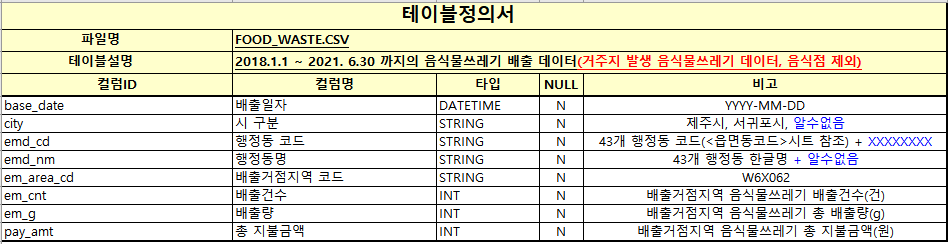

In [18]:
foodwaste.head()

,base_date,city,emd_cd,emd_nm,em_area_cd,em_cnt,em_g,pay_amt
0,2018-01-01,제주시,50110670,외도동,W6X062,2,15500,464
1,2018-01-01,제주시,50110540,이도2동,W6X063,26,64650,1933
2,2018-01-01,제주시,50110630,아라동,W6X064,15,33500,1001
3,2018-01-01,제주시,50110610,삼양동,W6X065,4,8400,252
4,2018-01-01,제주시,50110540,이도2동,W6X066,21,51450,1538


In [43]:
foodwaste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209861 entries, 0 to 2209860
Data columns (total 8 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   base_date   object
 1   city        object
 2   emd_cd      object
 3   emd_nm      object
 4   em_area_cd  object
 5   em_cnt      int64 
 6   em_g        int64 
 7   pay_amt     int64 
dtypes: int64(3), object(5)
memory usage: 134.9+ MB


* 알수없음이 꽤 많은데 얘를 어떻게 처리할지

In [40]:
none = foodwaste[foodwaste['city']=='알수없음']
none.head()

,base_date,city,emd_cd,emd_nm,em_area_cd,em_cnt,em_g,pay_amt
1399,2018-01-01,알수없음,알수없음,알수없음,W6Y402,21,142950,4283
1404,2018-01-01,알수없음,알수없음,알수없음,W6Y407,13,211050,6329
1406,2018-01-01,알수없음,알수없음,알수없음,W6Y409,7,44950,1348
2849,2018-01-02,알수없음,알수없음,알수없음,W6Y402,20,104250,3123
2854,2018-01-02,알수없음,알수없음,알수없음,W6Y407,9,99250,2975


In [42]:
# 행정동별 배출건수/배출량/지불금액 합계
a1 = foodwaste.groupby('emd_nm')[['em_cnt', 'em_g', 'pay_amt']].sum()
a1.describe()

,em_cnt,em_g,pay_amt
count,4.200000e+01,4.200000e+01,4.200000e+01
mean,1.118182e+06,2.526506e+09,7.560787e+07
std,1.273046e+06,2.433049e+09,7.258623e+07
min,3.276800e+04,1.708031e+08,5.115933e+06
25%,3.174018e+05,9.926641e+08,2.988371e+07
50%,6.985720e+05,1.786809e+09,5.333555e+07
75%,1.283520e+06,2.764417e+09,8.258705e+07
max,5.373862e+06,1.059136e+10,3.161831e+08


### 02 내국인 유동인구
* 제주/그외로 나누기 -> 내국인 관광객 수 파악
* 거주인구/근무인구/방문인구 -> 관광 위주 행정동인지 아닌지 파악

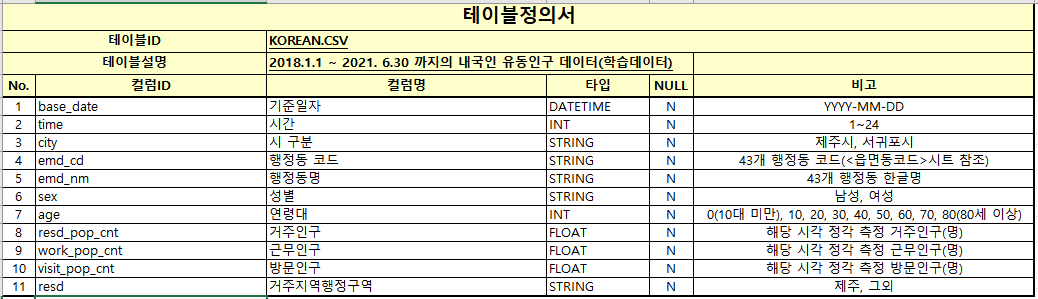

In [20]:
korean.head()

,base_date,time,city,emd_cd,emd_nm,sex,age,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd
0,2018-01-01,1,제주시,50110250,한림읍,여성,0,638.5509,15.5400,151.5149,제주
1,2018-01-01,1,제주시,50110250,한림읍,여성,0,0.0000,3.7249,171.3458,그외
2,2018-01-01,1,제주시,50110250,한림읍,여성,10,668.4577,17.0308,166.0500,제주
3,2018-01-01,1,제주시,50110250,한림읍,여성,10,0.0000,4.2577,195.8539,그외
4,2018-01-01,1,제주시,50110250,한림읍,여성,20,609.7710,5.9490,148.7246,제주


### 03 장기체류 외국인 유동인구

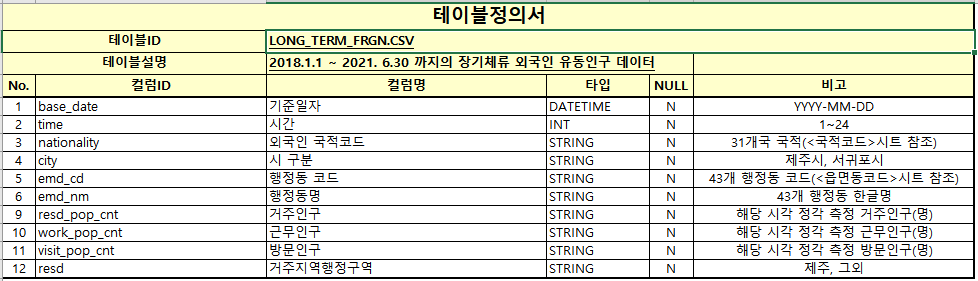

In [21]:
longfrgn.head()

,base_date,time,nationality,city,emd_cd,emd_nm,resd_pop_cnt,work_pop_cnt,visit_pop_cnt,resd
0,2018-01-01,1,CAN,제주시,50110250,한림읍,6.3381,0.0000,4.5802,제주
1,2018-01-01,1,CHN,제주시,50110250,한림읍,442.1091,0.0000,5.7051,제주
2,2018-01-01,1,CHN,제주시,50110250,한림읍,0.0000,7.8695,51.3461,그외
3,2018-01-01,1,DEU,제주시,50110250,한림읍,0.0000,0.0000,8.2099,그외
4,2018-01-01,1,ETC,제주시,50110250,한림읍,15.9184,0.0000,2.8758,제주


### 04 단기체류 외국인 유동인구

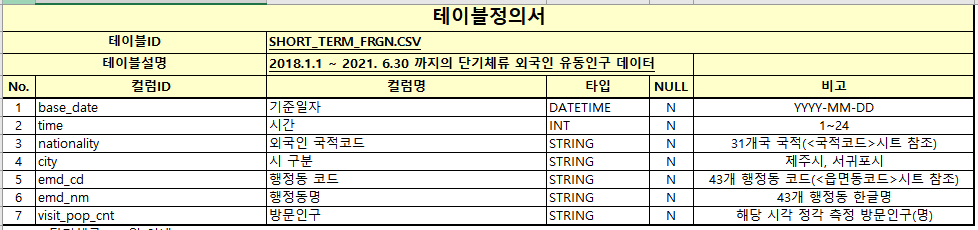

In [23]:
shortfrgn.head()

,base_date,time,nationality,city,emd_cd,emd_nm,visit_pop_cnt
0,2018-01-01,1,CHN,제주시,50110250,한림읍,66.3170
1,2018-01-01,1,ETC,제주시,50110250,한림읍,21.1308
2,2018-01-01,1,HKG,제주시,50110250,한림읍,3.6771
3,2018-01-01,1,JPN,제주시,50110250,한림읍,5.5962
4,2018-01-01,1,USA,제주시,50110250,한림읍,3.9078


### 05 거주인구
* 거주인구가 많다고 음식물 쓰레기 배출량이 많지는 않을 수도 
* 음식물 쓰레기 주된 배출 요인이 거주민인지 관광객인지 구분 필요
* 근데 주여진 음쓰 데이터는 거주민밖에 없는게 문제

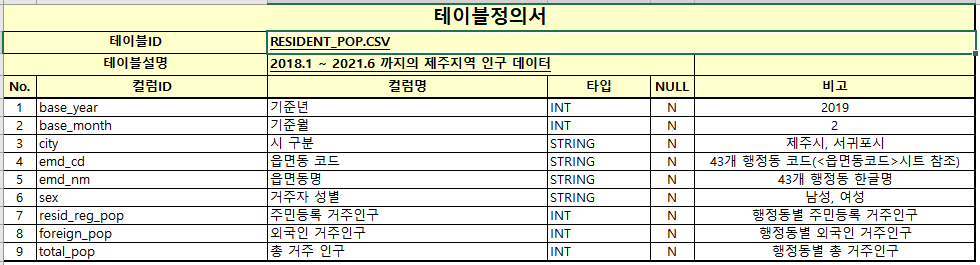

In [24]:
residpop.head()

,base_year,base_month,city,emd_cd,emd_nm,sex,resid_reg_pop,foreign_pop,total_pop
0,2018,1,제주시,50110590,건입동,남성,5085,146,5231
1,2018,1,제주시,50110590,건입동,여성,4715,82,4797
2,2018,1,제주시,50110256,구좌읍,남성,7965,368,8333
3,2018,1,제주시,50110256,구좌읍,여성,7609,184,7793
4,2018,1,서귀포시,50130253,남원읍,남성,9806,428,10234


### 06 음식관련 카드 소비
* 카드소비량과 음식물쓰레기 배출량이 비례하는지 확인

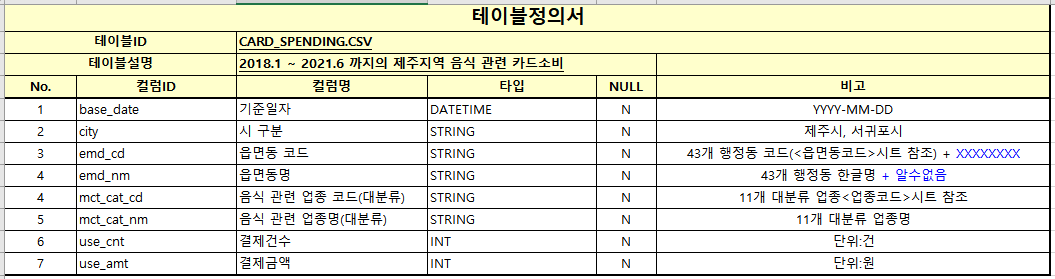

In [25]:
card.head()

,base_date,city,emd_cd,emd_nm,mct_cat_cd,mct_cat_nm,use_cnt,use_amt
0,2018-01-06,제주시,50110650,연동,C00100,한식,3643,127777300
1,2018-01-09,제주시,50110650,연동,C00500,패스트푸드,432,6711675
2,2018-01-15,제주시,50110650,연동,C01200,농축수산물,236,16089579
3,2018-01-15,제주시,50110650,연동,A00200,마트/슈퍼마켓,4031,121979867
4,2018-01-20,제주시,50110650,연동,C01000,식품,633,30410674


# EDA
* profile: https://pandas-profiling.github.io/pandas-profiling/docs/master/rtd/
* sweetviz: https://github.com/fbdesignpro/sweetviz

In [3]:
import pandas as pd
from pandas_profiling import ProfileReport

In [36]:
# EDA Report 생성
profile = ProfileReport(
            foodwaste,
            minimal=False,
            explorative=True,
            title='Food Waste Profiling',
            plot={'histogram': {'bins': 8}},
            pool_size=4,
            progress_bar=True)

# Report 결과 경로에 저장
profile.to_file(output_file="foodwaste_profiling.html")

C:\Users\user\anaconda3\lib\site-packages\scipy\stats\stats.py:4594: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))
C:\Users\user\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 44480 missing from current font.
  font.s

In [4]:
# EDA Report 생성
profile = ProfileReport(
            korean,
            minimal=False,
            explorative=True,
            title='Korean Profiling',
            plot={'histogram': {'bins': 8}},
            pool_size=4,
            progress_bar=True)

# Report 결과 경로에 저장
profile.to_file(output_file="korean_profiling.html")

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

C:\Users\user\anaconda3\lib\site-packages\scipy\stats\stats.py:4594: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))
exception calling callback for <Future at 0x1949e93c880 state=finished returned list>
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 820, in dispatch_one_batch
    tasks = self._ready_batches.get(block=False)
  File "C:\Users\user\anaconda3\lib\queue.py", line 167, in get
    raise Empty
_queue.Empty

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\externals\loky\_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 359, in __call__
    self.parallel.dispatch_next()
  File "C:\Users\user\anaconda3\lib\site-packages\joblib\parallel.py", line 792, in d

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\user\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 44480 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
# EDA Report 생성
profile = ProfileReport(
            longfrgn,
            minimal=False,
            explorative=True,
            title='Long term Foreign Profiling',
            plot={'histogram': {'bins': 8}},
            pool_size=4,
            progress_bar=True)

# Report 결과 경로에 저장
profile.to_file(output_file="longfrgn_profiling.html")

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

C:\Users\user\anaconda3\lib\site-packages\scipy\stats\stats.py:4594: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\user\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 44480 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
# EDA Report 생성
profile = ProfileReport(
            shortfrgn,
            minimal=False,
            explorative=True,
            title='Short term Foreign Profiling',
            plot={'histogram': {'bins': 8}},
            pool_size=4,
            progress_bar=True)

# Report 결과 경로에 저장
profile.to_file(output_file="shortfrgn_profiling.html")

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

C:\Users\user\anaconda3\lib\site-packages\scipy\stats\stats.py:4594: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\user\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 44480 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
# EDA Report 생성
profile = ProfileReport(
            residpop,
            minimal=False,
            explorative=True,
            title='Resident Population Profiling',
            plot={'histogram': {'bins': 8}},
            pool_size=4,
            progress_bar=True)

# Report 결과 경로에 저장
profile.to_file(output_file="residpop_profiling.html")

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\user\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 44480 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
# EDA Report 생성
profile = ProfileReport(
            card,
            minimal=False,
            explorative=True,
            title='Card Spending Profiling',
            plot={'histogram': {'bins': 8}},
            pool_size=4,
            progress_bar=True)

# Report 결과 경로에 저장
profile.to_file(output_file="card_profiling.html")

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\user\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 51228 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 51452 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 44480 missing from current font.
  font.set_text(s, 0.0, flags=LOAD_NO_HINTING)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\textpath.py:74: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]